# EE361M Project - Predicting Engineering Salaries - Preprocessing

In [41]:
# Import here
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [42]:
# Pull data here
popData = pd.read_csv("texasPopData.csv")
popData.shape

(253599, 284)

In [43]:
houseData = pd.read_csv("texasHousingData.csv")
houseData.shape

(113080, 232)

## Histogram of the Incomes

In [44]:
del(popData['ADJINC'])
x86 = popData.merge(houseData, left_on = 'SERIALNO', right_on = 'SERIALNO', how = 'inner', copy = False)

In [45]:
x1 = x86[x86['HINCP']>0]
x1.shape
np.isnan(x1['PARTNER'])
x1['FINCP'].isnull().sum()

33210

In [46]:
#x1['HINCP'].mean()
x1['HINCP'].describe(percentiles=[0.01, .025, .25, .5, .75, .975, 0.99])

count     240663.000000
mean       83914.949024
std        86035.573868
min            1.000000
1%          3230.000000
2.5%        7300.000000
25%        32550.000000
50%        61000.000000
75%       105000.000000
97.5%     343680.000000
99%       448000.000000
max      1354000.000000
Name: HINCP, dtype: float64

In [47]:
newTotal = x86[x86['PINCP'] > 0]
newTotal.shape

(170919, 514)

In [48]:
import matplotlib.mlab as mlab
import math

170919


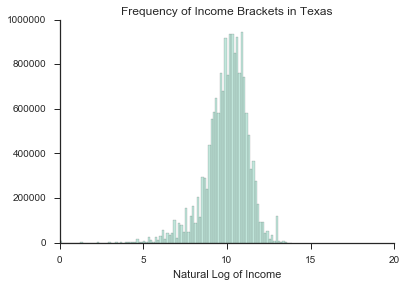

In [49]:
# Adjust incomes without weights

newTotal = x86[x86['PINCP'] > 0]
#newIncomes = newIncomes.dropna()
#newIncomes = newIncomes [newIncomes > 0] # ignoring incomes of 0
newIncomes = newTotal['PINCP']
newIncomes = np.log(newIncomes.values)
print(newIncomes.size)

fig = plt.figure()
temp = fig.add_subplot(111) 
temp.set_title('Frequency of Income Brackets in Texas')
temp.set_xlim(0, 20)
#temp.set_ylim(0, 10000)

sns.distplot(newIncomes, kde=False, bins=100, hist_kws={'weights':newTotal['PWGTP']}, ax = temp, axlabel = "Natural Log of Income")
sns.despine()

10.0000301162
1.69867461434


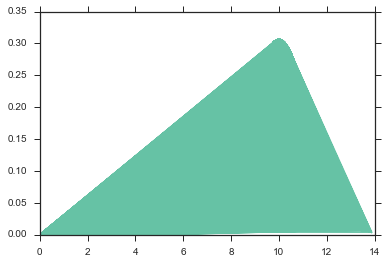

In [50]:
mean = newIncomes.mean()
print(mean)
variance = newIncomes.var()
print(variance)
sigma = np.sqrt(variance)
plt.plot(newIncomes,mlab.normpdf(newIncomes,mean,sigma))

plt.show()

In [51]:
newIncomes.describe(percentiles=[0.01, .025, .25, .5, .75, .975, 0.99])

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
#plt.boxplot(newIncomes, 0, 'rs', 0)
#plt.boxplot(newIncomes, 0, 'rs', 0, 0.75)
#fig = plt.figure()
#temp = fig.add_subplot(111) 
#temp.set_title('Frequency of Income Brackets in Texas')
#temp.set_xlim(0, 200000)

#plt.figure()
#plt.boxplot(data)

#plt.boxplot(newIncomes, 0, '')
#plt.boxplot(newIncomes, 0, 'gD')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

In [15]:
import plotly.plotly as py
py.sign_in('stanj', 'txwthlkcd7')

In [ ]:
newData = x86[x86['ESR'].isin([1,4])] 
targetIncome = newData[newData['OCCP']==10] # CHIEF EXECUTIVES AND LEGISLATORS
targetIncome7 = newData[newData['OCCP']==110] # .MGR-COMPUTER AND INFORMATION SYSTEMS MANAGERS
targetIncome12 = newData[newData['OCCP']==3010] # .MED-DENTISTS

targetIncome13 = newData[newData['OCCP']==3060] # .MED-PHYSICIANS AND SURGEONS
targetIncome14 = newData[newData['OCCP']==3256] # .MED-NURSE ANESTHETISTS
targetIncome16 = newData[newData['OCCP']==4930] # .SAL-SALES ENGINEERS
targetIncome21 = newData[newData['OCCP']==1350] # .ENG-CHEMICAL ENGINEERS
targetIncome22 = newData[newData['OCCP']==1400] # .ENG-COMPUTER HARDWARE ENGINEERS
targetIncome23 = newData[newData['OCCP']==1410] # .ENG-ELECTRICAL AND ELECTRONICS ENGINEERS
targetIncome24 = newData[newData['OCCP']==1520] # .ENG-PETROLEUM, MINING AND GEOLOGICAL ENGINEERS, INCLUDING
                #.MINING SAFETY ENGINEERS
targetIncome25 = newData[newData['OCCP']==9030] # .TRN-AIR TRAFFIC CONTROLLERS
print(targetIncome25.shape)
targetIncome26 = newData[newData['OCCP']==3050]


y0 = targetIncome['PINCP']
y6 = targetIncome7['PINCP']
y11 = targetIncome12['PINCP']
y12 = targetIncome13['PINCP']
y13 = targetIncome14['PINCP']
y15 = targetIncome16['PINCP']
y20 = targetIncome21['PINCP']
y21 = targetIncome22['PINCP']
y22 = targetIncome23['PINCP']
y23 = targetIncome24['PINCP']
y24 = targetIncome25['PINCP']
y25 = targetIncome26['PINCP']

ceos = go.Box(
    name='CEOs, LEGISLATORS',
    y=y0
)
managers6 = go.Box(
    name='COMPUTER MANAGERS',
    y=y6
)
fin2 = go.Box(
    name='DENTISTS',
    y=y11
)
ab = go.Box(
    name='PHYSICIANS, SURGEONS',
    y=y12
)
abc = go.Box(
    name='NURSE ANESTHETISTS',
    y=y13
)
abcde = go.Box(
    name='SALES ENGINEERS',
    y=y15
)
abcde1 = go.Box(
    name='CHEMICAL ENGINEERS',
    y=y20
)
abcdef1 = go.Box(
    name='COMPUTER HARDWARE',
    y=y21
)

ab2 = go.Box(
    name='ELECTRICAL ENGINEERS',
    y=y22
)
abc2 = go.Box(
    name='PETROLEUM ENGINEERS',
    y=y23
)
abcd2 = go.Box(
    name='AIR TRAFFIC CONTROLLERS', # econ taken out
    y=y24
)
abcdkj2 = go.Box(
    name='PHARMACISTS',
    y=y25
)
data = [ceos, managers6, fin2, ab, abc, abcde, abcde1, abcdef1, ab2, abc2, abcd2, abcdkj2]
plot_url = py.plot(data, filename='basic-box-plot')

In [ ]:
pieChart = popData[popData['PINCP']>100000]

In [ ]:
divorce = pieChart[pieChart['MAR']==1]
divorce2 = pieChart[pieChart['MAR']==2]
divorce3 = pieChart[pieChart['MAR']==3]
divorce4 = pieChart[pieChart['MAR']==4]
divorce5 = pieChart[pieChart['MAR']==5]
countMarried = divorce['MAR'].count()
countWidowed = divorce2['MAR'].count()
countDivorced = divorce3['MAR'].count()
countSeparated = divorce4['MAR'].count()
countNeverMarried = divorce5['MAR'].count()
print(countMarried)
print(countWidowed)
print(countDivorced)
print(countSeparated)
print(countNeverMarried)

In [ ]:
fig = {
    'data': [{'labels': ['Married', 'Widowed', 'Divorced', 'Separated', 'NeverMarried'],
              'values': [countMarried, countWidowed, countDivorced, countSeparated, countNeverMarried],
              'type': 'pie'}],
    'layout': {'title': 'Marital Status of >100k earners in Texas'}
}

url = py.plot(fig, filename='Pie Chart Example')

In [ ]:
pieChart2 = popData[popData['PINCP']>10000]
pieChart2 = pieChart2[pieChart2['PINCP']<100000]

In [ ]:
divorce = pieChart2[pieChart2['MAR']==1]
divorce2 = pieChart2[pieChart2['MAR']==2]
divorce3 = pieChart2[pieChart2['MAR']==3]
divorce4 = pieChart2[pieChart2['MAR']==4]
divorce5 = pieChart2[pieChart2['MAR']==5]
countMarried = divorce['MAR'].count()
countWidowed = divorce2['MAR'].count()
countDivorced = divorce3['MAR'].count()
countSeparated = divorce4['MAR'].count()
countNeverMarried = divorce5['MAR'].count()
print(countMarried)
print(countWidowed)
print(countDivorced)
print(countSeparated)
print(countNeverMarried)

In [ ]:
fig = {
    'data': [{'labels': ['Married', 'Widowed', 'Divorced', 'Separated', 'NeverMarried'],
              'values': [countMarried, countWidowed, countDivorced, countSeparated, countNeverMarried],
              'type': 'pie'}],
    'layout': {'title': 'Marital Status of <100k earners in Texas'}
}

url = py.plot(fig, filename='Pie Chart Example')

In [21]:
checkHouses = x86[x86['PINCP']>100000]
tempHouse = tempHouse[tempHouse['VALP']<100000]
num1_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>100000]
tempHouse = tempHouse[tempHouse['VALP']<200000]
num2_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>200000]
tempHouse = tempHouse[tempHouse['VALP']<300000]
num3_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>300000]
tempHouse = tempHouse[tempHouse['VALP']<400000]
num4_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>400000]
tempHouse = tempHouse[tempHouse['VALP']<500000]
num5_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>500000]
num6_1 = tempHouse['VALP'].count()

In [27]:
checkHouses = x86[x86['PINCP']>0]
checkHouses = checkHouses[checkHouses['PINCP']<100000]
tempHouse = checkHouses[checkHouses['VALP']>0]
tempHouse = tempHouse[tempHouse['VALP']<100000]
num1_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>100000]
tempHouse = tempHouse[tempHouse['VALP']<200000]
num2_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>200000]
tempHouse = tempHouse[tempHouse['VALP']<300000]
num3_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>300000]
tempHouse = tempHouse[tempHouse['VALP']<400000]
num4_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>400000]
tempHouse = tempHouse[tempHouse['VALP']<500000]
num5_1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>500000]
num6_1 = tempHouse['VALP'].count()
numTot1 = num1_1+num2_1+num3_1+num4_1+num5_1+num6_1

In [28]:
checkHouses = x86[x86['PINCP']>=100000]
tempHouse = checkHouses[checkHouses['VALP']>0]
tempHouse = tempHouse[tempHouse['VALP']<100000]
num1 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>100000]
tempHouse = tempHouse[tempHouse['VALP']<200000]
num2 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>200000]
tempHouse = tempHouse[tempHouse['VALP']<300000]
num3 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>300000]
tempHouse = tempHouse[tempHouse['VALP']<400000]
num4 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>400000]
tempHouse = tempHouse[tempHouse['VALP']<500000]
num5 = tempHouse['VALP'].count()
tempHouse = checkHouses[checkHouses['VALP']>500000]
num6 = tempHouse['VALP'].count()
numTot2 = num1+num2+num3+num4+num5+num6

In [40]:
trace1 = go.Bar(
    x=['0 to 100k', '100k to 200k', '200k to 300k', '300k to 400k', '400k to 500k', 'More than 500k'],
    y=[num1_1/numTot1*100, num2_1/numTot1*100, num3_1/numTot1*100, num4_1/numTot1*100, num5_1/numTot1*100, num6_1/numTot1*100],
    name='Class that earns less than 100k'
)
trace2 = go.Bar(
    x=['0 to 100k', '100k to 200k', '200k to 300k', '300k to 400k', '400k to 500k', 'More than 500k'],
    y=[num1/numTot2*100, num2/numTot2*100, num3/numTot2*100, num4/numTot2*100, num5/numTot2*100, num6/numTot2*100],
    name='Class that earns at least 100k'
)
data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Property Value for Two Classes of Earners in Texas',
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='grouped-bar')

In [35]:
targetIncome26['PINCP'].describe()

NameError: name 'targetIncome26' is not defined

In [ ]:
newData = df[df['ESR'].isin([1,4])] 
print(newData.shape)
newEmployedIncomes = newData['PINCP']
newEmployedIncomes = newEmployedIncomes.dropna()
newEmployedIncomes.describe(percentiles=[0.01, .025, .25, .5, .75, .975, 0.99])
#plt.boxplot(newEmployedIncomes[newEmployedIncomes['OCCP']==10], 0, 'gD')

#plt.figure()
#plt.boxplot(data)

In [ ]:
from scipy import stats
# This is general statistics on income greater than $0
# Not weighted
print(newEmployedIncomes.describe(percentiles=[0.01, .025, 0.20, .25, .5, .75, 0.8, 0.9, .975, 0.99]))
stats.percentileofscore(newEmployedIncomes, 100000)

## Scatter plots

In [ ]:
import math
#tempNewData = newData[newData['OCCP'] == 20]

x = newData['OCCP']/100
x = x.round()

type(x)


#tempNewData['PINCP'].describe()

#newData['FOD1P']
#newData['FOD2P']
#newData['FOD1P']
#newData['INDP']

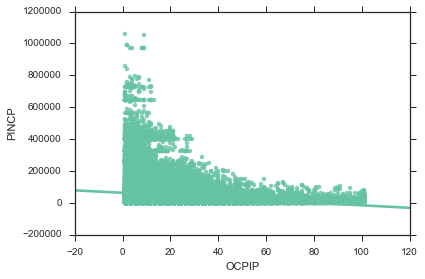

In [13]:
# Just to see scatter plots of relevant variables to predict income
newIncome = x86[x86['PINCP']>0]
sns.regplot(newIncome['OCPIP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['SMOCP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['TAXP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['SCHL'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['GASP'], newIncome['PINCP'])

In [ ]:
quest = newIncome[newIncome['ELEP']>500]
print(quest.shape)
features = ['PINCP', 'SERIALNO', 'AGEP', 'SCHL', 'FOD1P', 'RMSP', 'RELP','GASP', 'ELEP', 'BLD']
something = quest.copy()
something = something[features]
something

In [ ]:
sns.regplot(newIncome['ELEP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['BDSP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['FULP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['VEH'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['RMSP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['RNTP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['GRNTP'], newIncome['PINCP'])

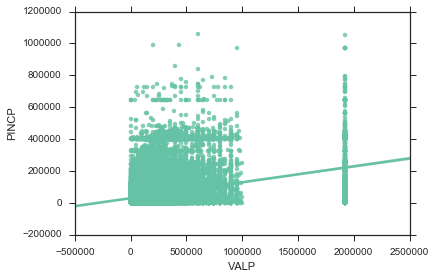

In [16]:
sns.regplot(newIncome['VALP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['RETP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['RNTP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['WATP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['GRPIP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['SMP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['YBL'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['WAGP'], newIncome['PINCP'])

In [ ]:
sns.regplot(newIncome['INTP'], newIncome['SEMP'])

## Simple Linear Regression 

In [319]:
from sklearn.linear_model import LinearRegression

print(df.shape)
df = df[np.isfinite(df['SEMP'])]
df = df[np.isfinite(df['PINCP'])]
print(df.shape)

clf = LinearRegression()
clf.fit(df['SEMP'].reshape(-1, 1), df['PINCP'])

(253599, 284)
(202913, 284)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [326]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

df = df[np.isfinite(df['RETP'])]
#df = df[np.isfinite(df['WAGP'])]

y = df['PINCP'].values
X = pd.DataFrame({ 'WAGP': df['WAGP'],
                  'RETP': df['RETP'],
                  'SEMP': df['SEMP'],
                  'INTP': df['INTP']
    })

X = X.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("On average, our prediction is off by a MEDV amount of: {}".format(rmse))

On average, our prediction is off by a MEDV amount of: 7208.292046690878


In [184]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 347296956.2049119
Test MSE: 341305276.0223773


In [185]:
variables = ['WAGP', 'RETP', 'SEMP']
print("Coefficients: {}".format(dict(zip(variables, clf.coef_))))

Coefficients: {'SEMP': 0.99843324599654215, 'WAGP': 1.285143893944708, 'RETP': 1.0523954909821795}


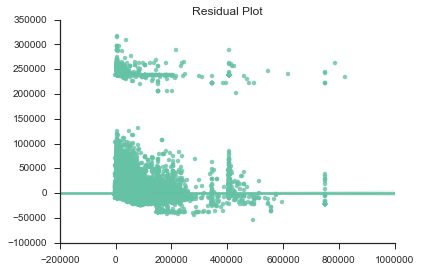

In [186]:
residuals = y_train - train_predictions
plt.title("Residual Plot")
sns.regplot(train_predictions, residuals)
sns.despine()

## Engineers

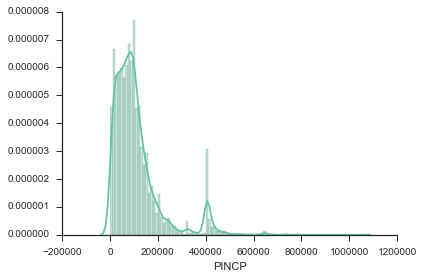

In [204]:
temp1 = df['FOD1P']>=2400
temp2 = df['FOD1P']<2500
engee = df[temp1&temp2]
engeeIncomes = engee['PINCP']
engeeIncomes = engeeIncomes[engeeIncomes>0]
sns.distplot(engeeIncomes, bins=100)
sns.despine()

In [188]:
engeeIncomes.describe(percentiles=[0.01, .025, .25, .5, .75, .975, 0.99])

count       4360.000000
mean      107954.935321
std       101478.770265
min            1.000000
1%          1783.600000
2.5%        5200.000000
25%        45000.000000
50%        85000.000000
75%       130000.000000
97.5%     407610.000000
99%       446000.000000
max      1051000.000000
Name: PINCP, dtype: float64

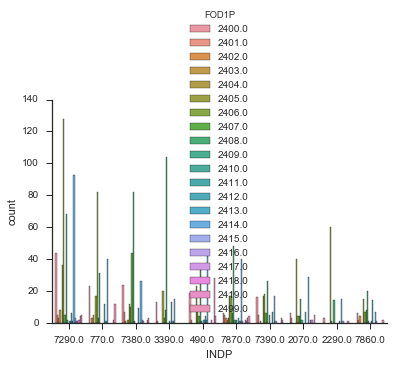

In [189]:
sns.countplot(x="INDP", hue="FOD1P", data=engee, order=engee['INDP'].value_counts().iloc[:10].index)
sns.despine()

7290 corresponds to .PRF-ARCHITECTURAL, ENGINEERING, AND RELATED SERVICES
770 corresponds to .CON-CONSTRUCTION, INCL CLEANING DURING AND IMM AFTER
7380 corresponds to .PRF-COMPUTER SYSTEMS DESIGN AND RELATED SERVICES
3390 corresponds to .MFG-ELECTRONIC COMPONENTS AND PRODUCTS, N.E.C.
490 corresponds to .EXT-SUPPORT ACTIVITIES FOR MINING
7870 .EDU-COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS, .INCLUDING JUNIOR COLLEGES
7390 .EDU-OTHER SCHOOLS AND INSTRUCTION, AND EDUCATIONAL SUPPORT .SERVICES
2070 .MFG-PETROLEUM REFINING
2290 .MFG-INDUSTRIAL AND MISCELLANEOUS CHEMICALS
7860 .EDU-ELEMENTARY AND SECONDARY SCHOOLS

## Multiple Linear Regression

In [440]:
features = ['PINCP', 'RETP', 'SEMP', 'INTP']
newDataSJ = df.copy()
newDataSJ = df[features]
#print(newDataSJ.shape)
newDataSJ = newDataSJ[np.isfinite(newDataSJ['PINCP'])]
#print(newDataSJ.shape)

y = newDataSJ.PINCP
del newDataSJ['PINCP']

X_train, X_test, y_train, y_test = train_test_split(newDataSJ, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("On average, our prediction is off by a MEDV amount of: {}".format(rmse))

On average, our prediction is off by a MEDV amount of: 46535.75630905472


In [441]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
from sklearn.metrics import roc_curve, auc
%matplotlib inline

(66962,)
(66962,)
62087
257
3325
875
[[62087   257]
 [ 3325   875]]
Below 100000 Acc: [[ 0.99587771]]
Above 100000 Acc: [[ 0.20833333]]
Avg Acc: [[ 0.60210552]]


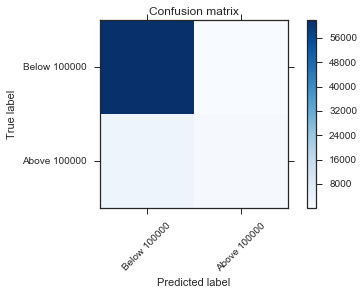

In [445]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Below 100000', 'Above 100000'], rotation=45)
    plt.yticks(tick_marks, ['Below 100000', 'Above 100000'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def accuracies(cm):
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    print("Below 100000 Acc: {0}".format(no_acc))
    print("Above 100000 Acc: {0}".format(yes_acc))
    print("Avg Acc: {0}".format((no_acc + yes_acc)/2))

#cm = confusion_matrix(y_test, predictions)
#plot_confusion_matrix(cm)
#accuracies(cm)
count1 = 0
count2 = 0
count3 = 0
count4 = 0
print(predictions.shape)

type(predictions)
print((y_test.values.shape))

for i in range(0,66962):
    if((predictions[i]<100000)&(y_test.values[i]<100000)):
        count1+=1
    elif((predictions[i]>100000)&(y_test.values[i]<100000)):
        count2+=1
    elif((predictions[i]<100000)&(y_test.values[i]>100000)):
        count3+=1
    elif((predictions[i]>100000)&(y_test.values[i]>100000)):
        count4+=1
print(count1)
print(count2)
print(count3)
print(count4)

cm = np.matrix([[count1, count2], [count3, count4]])
plot_confusion_matrix(cm)
accuracies(cm)

In [437]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))

print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 52207449.83083848
Test MSE: 51959474.23038707


In [342]:
variables = ['WAGP', 'RETP', 'SEMP', 'INTP']
print("Coefficients: {}".format(dict(zip(variables, clf.coef_))))

Coefficients: {'SEMP': 2.8542889881707638e-06, 'WAGP': 3.2431318104808385e-06, 'INTP': 3.3086069028467736e-06, 'RETP': 5.0946170295895808e-06}


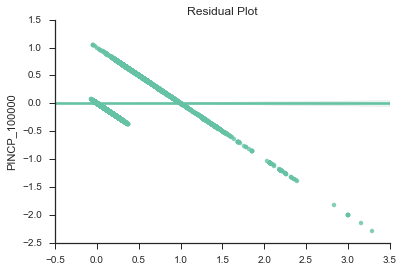

In [343]:
residuals = y_train - train_predictions
plt.title("Residual Plot")
sns.regplot(train_predictions, residuals)
sns.despine()

## Misc

In [194]:
top5percent = df[df['PINCP'] > 0]
print(top5percent.shape)

(170919, 284)


In [195]:
# Analyzing petroleum engineers' salaries
petroleum = df[df['FOD1P']==2419]
#print(petroleum['PINCP'])
#print(petroleum['PWGTP'])
petroleumSalary = petroleum['PINCP']*petroleum['PWGTP']
#print(petroleumSalary)
petroleumTotWeight = petroleum['PWGTP'].sum()
petroleumTotSalary = petroleumSalary.sum()
#print(petroleum['PINCP'].mean())
print(petroleumTotSalary/petroleumTotWeight)

200890.08401874945
